## 1절. 분류분석 개요

## 2절. 분류 모형

### 2.1 분류분석 모형의 종류

### 2.2 확률적 모형

### 2.3 확률적 생성모형

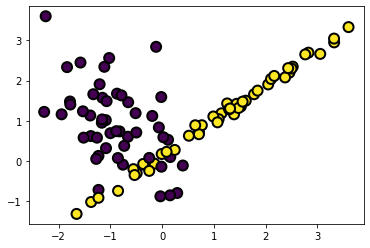

In [1]:
# 1. QDA (이차 판별 분석)
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                            n_clusters_per_class=1, n_classes=2, random_state=9)

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolors='k', linewidths=2)
plt.show()

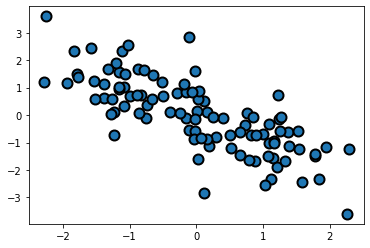

In [3]:
# 위의 데이터가 완벽한 대칭이 아님
# 예제 설명 위해 대칭구조로 데이터 수정
# y값 1인 데이터들을 y값이 0인 데이터들의 값을 반대 부호 갖도록 할당
X[y==1, :] = -(X[y==0, :])

plt.scatter(X[:, 0], X[:, 1], marker='o',
            s=100, edgecolors='k', linewidths=2)
plt.show()

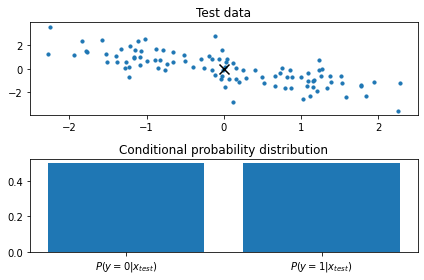

In [6]:
# QDA 모형 생성
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

# 주어진 위치의 데이터가 각 클래스에 속할 확률 구하기 => predict_proba()
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title('Test data')

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title('Conditional probability distribution')
plt.xticks(model.classes_, ['$P(y=0|x_{test})$', '$P(y=1|x_{test})$'])
plt.tight_layout()
plt.show()

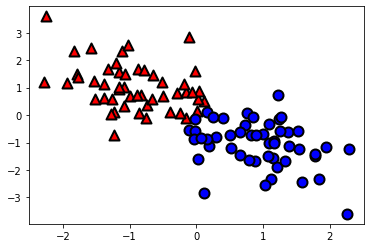

In [7]:
# QDA 모형을 이용해 분류 예측한 데이터의 클래스
h = model.predict(X)

plt.scatter(X[h==0, 0], X[h==0, 1], marker='^', c='r', s=100, edgecolors='k', linewidths=2)
plt.scatter(X[h==1, 0], X[h==1, 1], marker='o', c='b', s=100, edgecolors='k', linewidths=2)
plt.show()

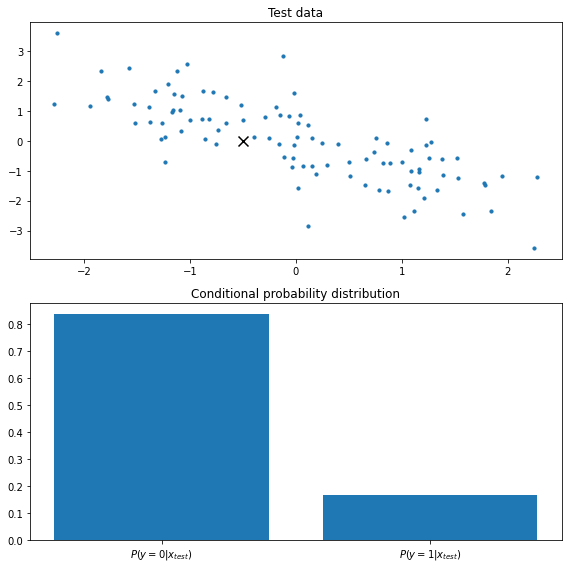

In [8]:
# 테스트 데이터가 y=0인 클래스에 더 가까울 시, P(y=0|x{test}) 가 0.5보다 커짐
x = [[-0.5, 0]]
p = model.predict_proba(x)[0]

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])

plt.tight_layout()
plt.show()

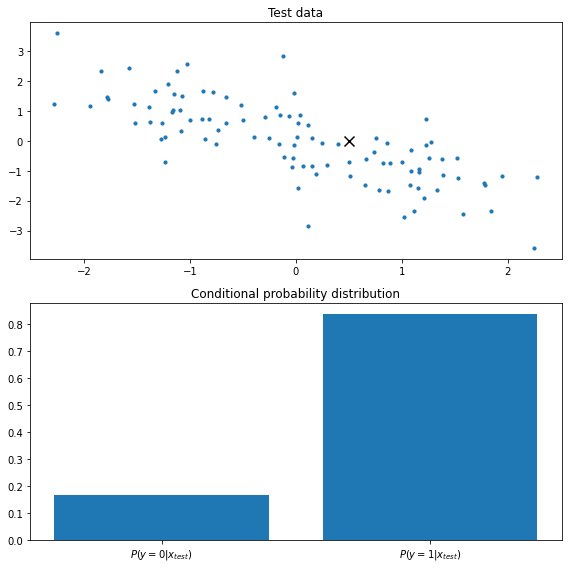

In [9]:
# 테스트 데이터가 y=1인 클래스에 더 가까울 시, P(y=1|x{test}) 가 0.5보다 커짐
x = [[0.5, 0]]
p = model.predict_proba(x)[0]

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])

plt.tight_layout()
plt.show()

In [5]:
# 2. 나이브 베이즈 모형
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.species

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X, y)

test_X = [[5.0, 3.4, 1.2, 0.25]]
model.predict(test_X)

array(['setosa'], dtype='<U10')

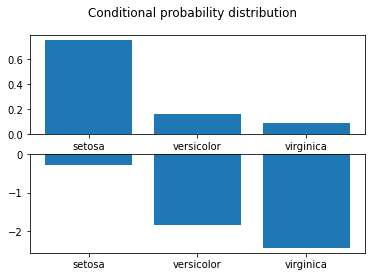

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xticks(model.classes_)

plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.xticks(model.classes_)

plt.suptitle('Conditional probability distribution')
plt.show()

### 2.4 확률적 판별모형

In [11]:
# 1. 로지스틱 회귀모형
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np

X, y = make_classification(n_features=1, n_redundant=0,
                            n_informative=1, n_clusters_per_class=1,
                            random_state=1)

model = LogisticRegression().fit(X, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]

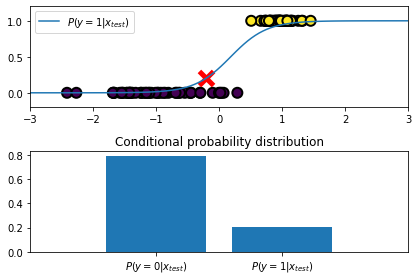

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

test_X = [[-0.2]]

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X, y, marker='o', c=y, s=100, edgecolors='k', linewidths=2)
plt.scatter(test_X[0], model.predict_proba(test_X)[0][1:], marker='x', s=200, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(['$P(y=1|x_{test})$'])

plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ['$P(y=0|x_{test})$', '$P(y=1|x_{test})$'])

plt.title('Conditional probability distribution')
plt.tight_layout()
plt.show()

In [1]:
# 2. 의사결정나무 모형
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

data = load_iris()
X = data.data[:, 2:]
y = data.target
feature_names = data.feature_names[2:]

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)
dt_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [3]:
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

def draw_decision_tree(model, feature_names=feature_names):
    # 문자열을 실제 파일 객체처럼 다루기 위함
    # 프로그램 정상 동작 여부 테스트 코드에 사용
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()

    return Image(image)

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))

    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

    return Z

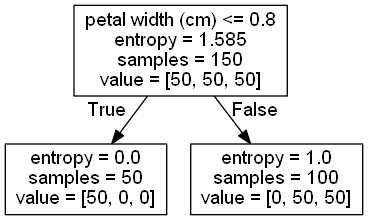

In [6]:
draw_decision_tree(dt_model, feature_names=data.feature_names[2:])

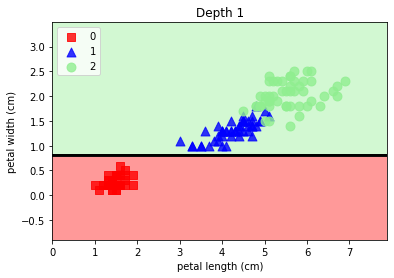

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [10]:
plot_decision_regions(X, y, dt_model, 'Depth 1')

In [11]:
dt_model5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_model5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

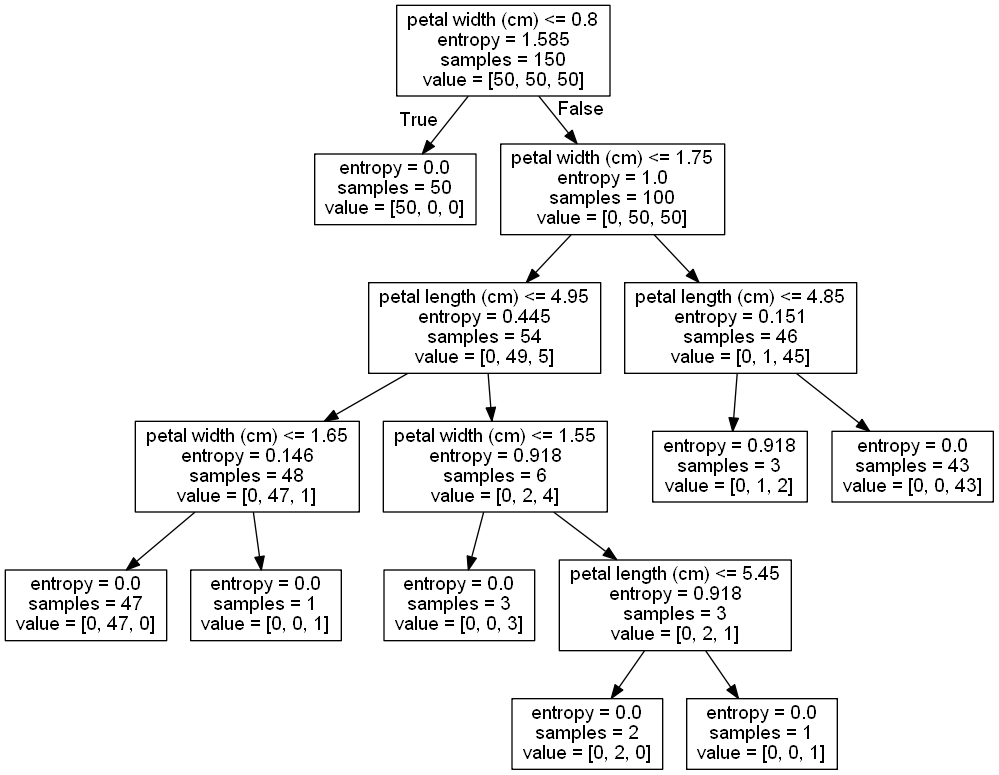

In [12]:
draw_decision_tree(dt_model5, feature_names=data.feature_names[2:])

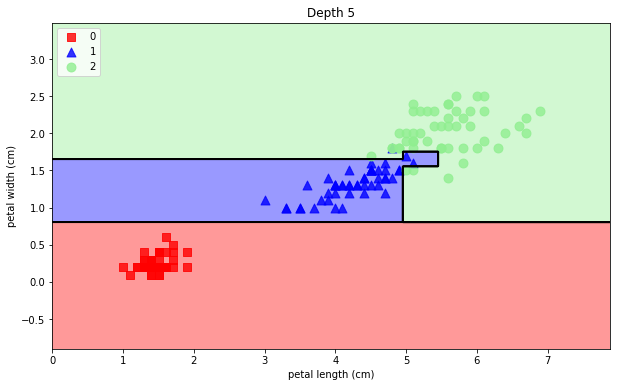

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [13]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, dt_model5, 'Depth 5')

### 2.5 판별함수 기반 모형

### 2.6 다중 클래스 분류

## 3절. 인공신경망

## 4절. 분류 모형 성능평가

### 4.1 사이킷런의 모형 평가 방법

### 4.2 분류모형 평가를 위한 scoring 속성

### 4.3 성능평가 함수

### 4.4 Confusion Matrix 분류 결과표

### 4.5 분류표 API

### 4.6 혼동행렬을 이용한 평가 방법

### 4.7 ROC & AUC